<a href="https://colab.research.google.com/github/K2FA/PCVK_Genap_2023/blob/main/ProjekAkhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Threshold')

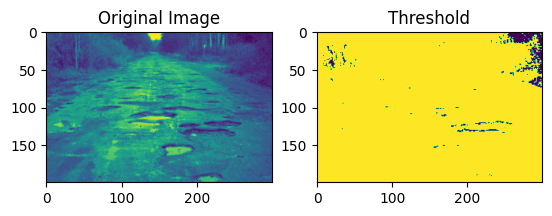

In [43]:
img = cv.imread('/content/drive/MyDrive/PCVK/ProjekBesar/3.jpg')
# img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

ret,thresh1 = cv.threshold(img_gray,30,255,cv.THRESH_BINARY)

plt.subplot(2,2,1),plt.imshow(img_gray)
plt.title('Original Image')
plt.subplot(2,2,2),plt.imshow(thresh1)
plt.title('Threshold')
     